# imports

In [1]:
# basic libs
import math
import numpy as np

import pandas as pd
from matplotlib import pyplot as plt

# plot settings

In [19]:
# setting for plots
import matplotlib

# output image quality
%config InlineBackend.figure_format = 'retina'

# set pyplot stype
plt.style.use('dark_background') # see more with plt.style.available


# defaut figsize
matplotlib.rcParams['figure.figsize'] = [6,4]

# defaut fontsize
font = {'size':14}
matplotlib.rc('font', **font)

# color pallete
colors = ['#2F58EB', '#773BEB', '#12B8EB', '#EB9846', '#8b8b8b', '#810f7c']

In [29]:
def clean_ax(ax):
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_yticks([])
    # for minor ticks
    ax.set_yticks([], minor=True)
    return ax

# Coin Confidence Interval

In [179]:
np.random.seed(0)

# coin, head=1, tail = 0.
t = 0.3

rounds = np.random.choice([0,1], size=1000, p = [1-t,t],replace=True,)

In [245]:
rounds[:100]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [204]:
t_hat = np.mean(rounds)
t_hat

0.291

In [259]:
def bootstrap(function, x, B):
    """
    """
    f_hat = []
    
    for i in range(B):
        x_star = np.random.choice(x,size=len(x),replace=True)
        estimate = function(x_star)
        f_hat.append(estimate)
        
    return np.array(sorted(f_hat))

In [260]:
B = 2000
t_B = bootstrap(np.mean, x = rounds, B=B)

In [207]:
# compute standard error
se = np.std(t_B)

CI_std = [t_hat-1.96*se,t_hat+1.96*se]

In [266]:
def plot_hist(t_hat,t_B,title=''):

    fig,ax = plt.subplots()

    ax = clean_ax(ax)

#     cb = '#001d7d'
    cb = '#5d016e'

    # plot hist t_B
    _ = plt.hist(t_B, bins = 'auto',color=cb,rwidth=0.9)

    # plotting CI
    plt.axvline(x=t,color='white')
    plt.text(s=r"$\theta$",x=t,y=10,color='white',weight='bold')

    # plotting CI
    i = 2
    plt.axvline(x=t_hat,color=colors[i])
    plt.text(s=r"$\hat{\theta}$",x=t_hat,y=10,color=colors[i],weight='bold')

    plt.title(r''+title)
    plt.xlabel(r'$\hat{\theta}^*$')

def plot_CI(t_hat,t_B,CI,title=''):

    fig,ax = plt.subplots()

    ax = clean_ax(ax)

#     cb = '#001d7d'
    cb = '#5d016e'

    # plot hist t_B
    _ = plt.hist(t_B, bins = 'auto',color=cb,rwidth=0.9)
    plt.xlabel(r'$\hat{\theta}^*$')

    # plotting CI
    for li in CI:
        plt.axvline(x=li,color='yellow',ls='--')
        plt.text(s="%.3f" %li,x=li,y=1,color='yellow',weight='bold')

    # plotting CI
    plt.axvline(x=t,color='white')
    plt.text(s=r"$\theta$",x=t,y=10,color='white',weight='bold')

    # plotting CI
    i = 2
    plt.axvline(x=t_hat,color=colors[i])
    plt.text(s=r"$\hat{\theta}$",x=t_hat,y=10,color=colors[i],weight='bold')

    plt.title(r''+title)

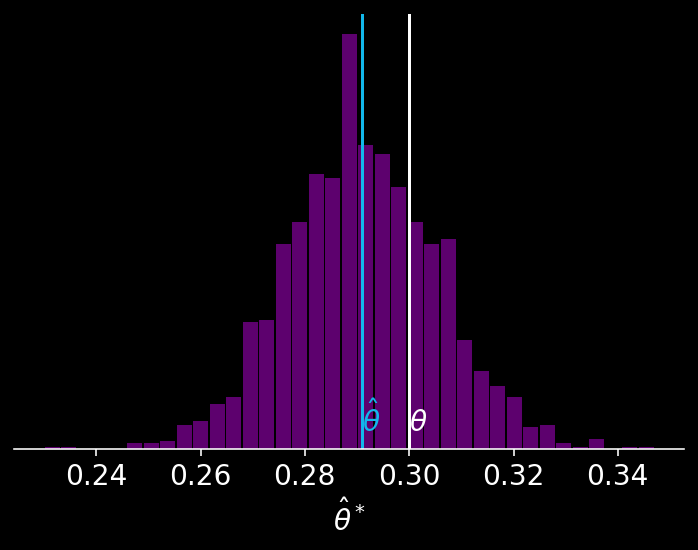

In [256]:
plot_hist(t_hat,t_B,title='')

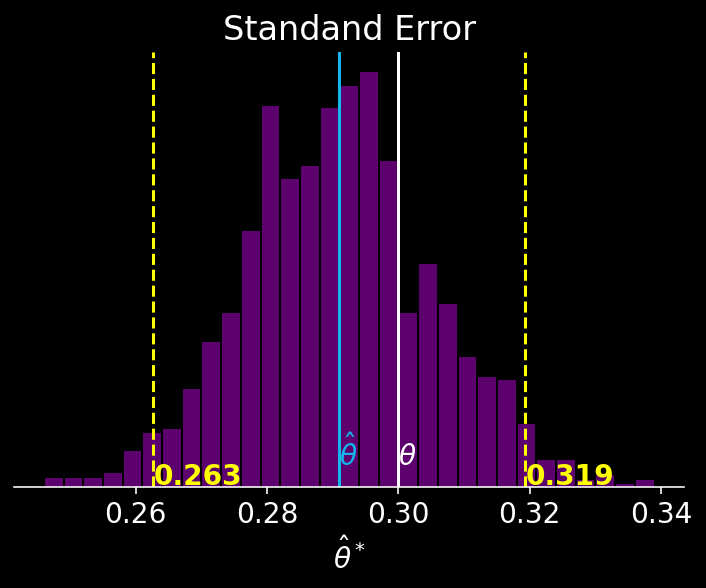

In [267]:
plot_CI(t_hat,t_B,CI_std,title='Standand Error')

In [269]:
# compute percentile

t_low = np.percentile(t_B,2.5)
t_up  = np.percentile(t_B,97.5)

CI_per = [t_low, t_up]



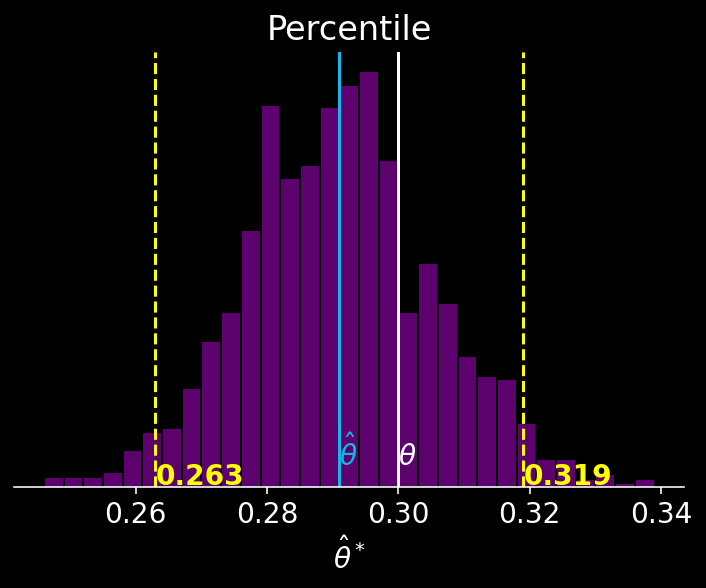

In [268]:
plot_CI(t_hat,t_B,CI_per,title='Percentile')

In [229]:
from scipy.stats import norm

In [230]:
t_hat

0.291

In [231]:
# Bias Corrected CI
p0 = len(t_B[ t_B < t_hat]) / B

z0 = norm.ppf(p0)  # (inverse of cum. distr. func.)

alpha_BC = norm.cdf(2*z0+1.96) #corrected conf. level

per_low = 100*(1-alpha_BC)/2 # low percentile
per_up = 100*alpha_BC + per_low # up percentile

t_low = np.percentile(t_B,per_low ) 
t_up = np.percentile(t_B,per_up)

CI_BC = [t_low,t_up]

print(p0,z0,alpha_BC,t_low,t_up)

0.493 -0.017547298372150792 0.9728794030883047 0.259 0.324


In [232]:
per_low,per_up

(1.3560298455847664, 98.64397015441524)

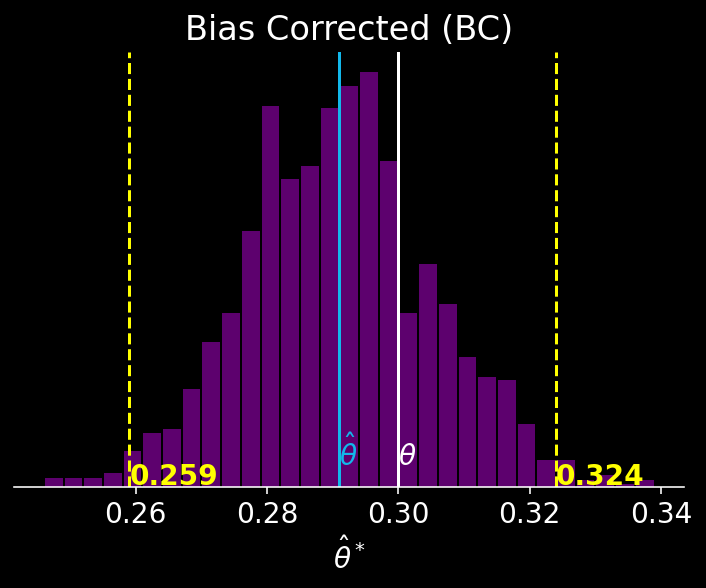

In [270]:
plot_CI(t_hat,t_B,CI_BC,title='Bias Corrected (BC)')

In [272]:
# lognormal de x para normal de log x 

Text(0.5, 0, '$\\log ~x$')

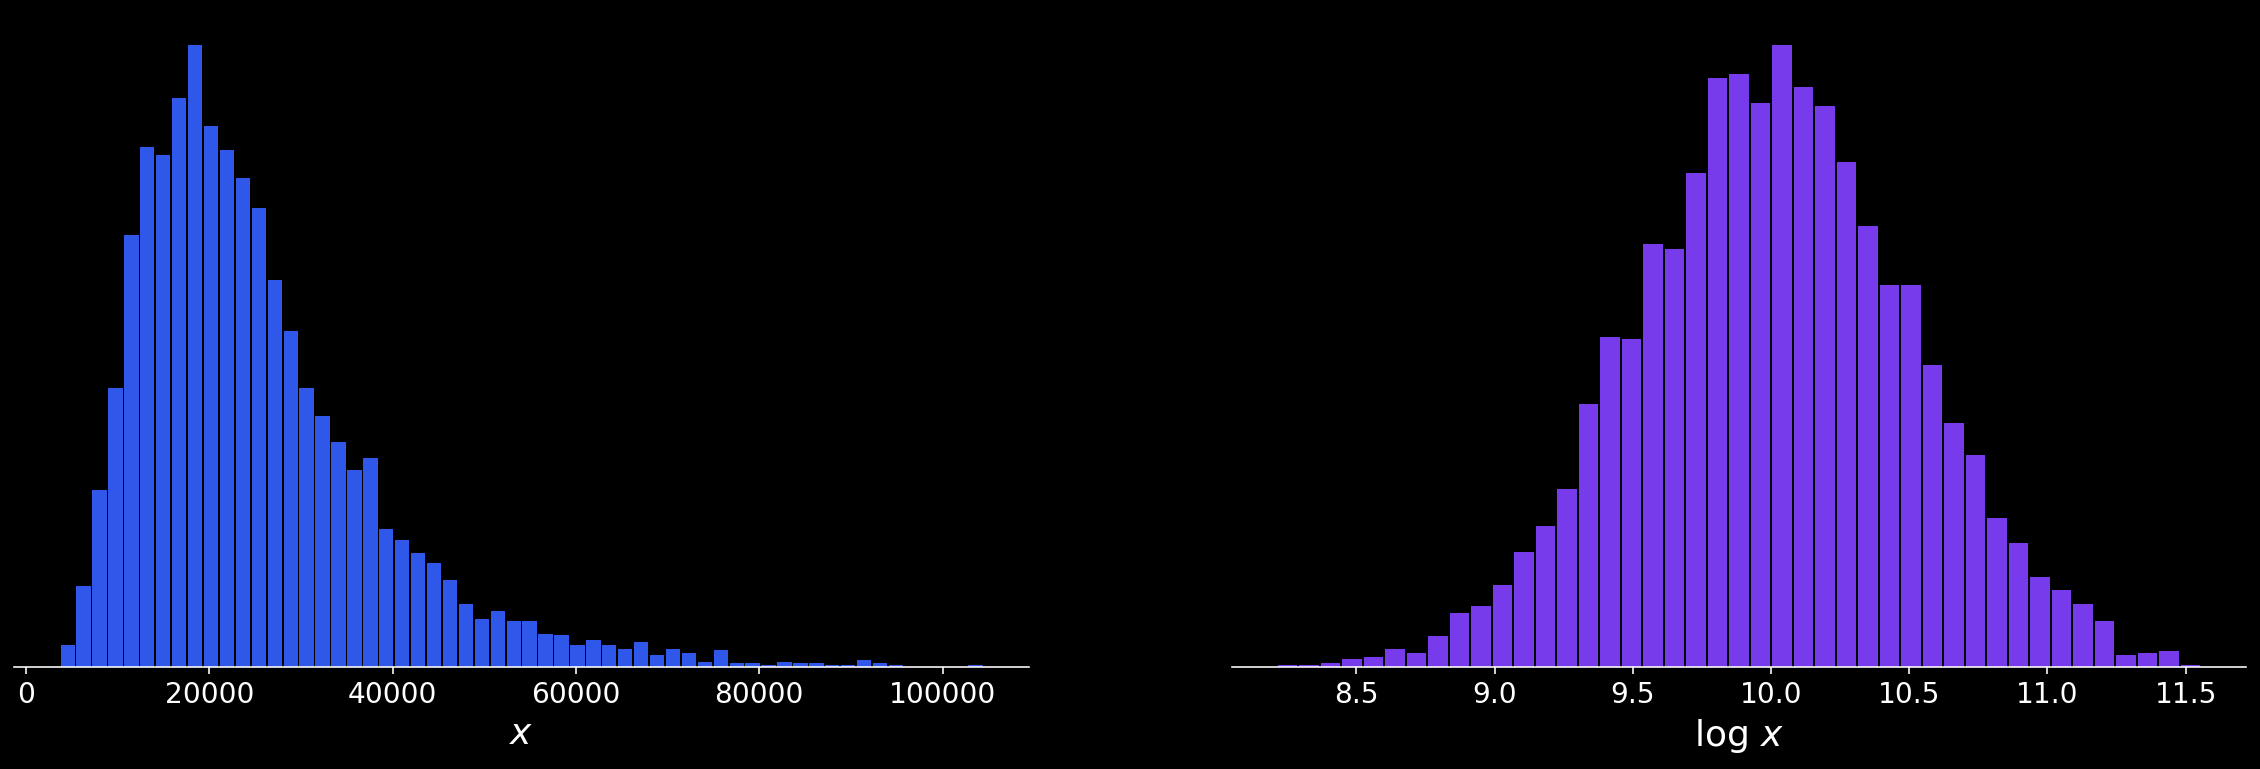

In [291]:
x = np.random.lognormal(mean=10,sigma=0.5,size=5000)

fig,ax = plt.subplots(1,2,figsize=(20,6))

for i in range(2):
    ax[i] = clean_ax(ax[i])


_=ax[0].hist(x,bins='auto',color=colors[0],rwidth=0.9)
ax[0].set_xlabel(r'$x$',fontsize=18)

_=ax[1].hist(np.log(x),bins='auto',color=colors[1],rwidth=0.9)
ax[1].set_xlabel(r'$\log ~x$',fontsize=18)